# **Sprint - 1**

# Imported libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Downloaded Packages

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')  # For additional wordnet languages


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Downloading and Data Loading

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [4]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
df = pd.read_csv('IMDB Dataset.csv')

# EDA

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
print("\n Shape :", df.shape)

print("\n Size:", df.size)

print("\n Info:",df.info())

print("\n Describe:",df.describe())

print("\n Missing:",df.isna().sum())

print("\n sum of null:",df.isnull().sum())

print("\n sum of unique rows",df.nunique().sum())

print("\n sum of duplicated",df.duplicated().sum())



 Shape : (50000, 2)

 Size: 100000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

 Info: None

 Describe:                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

 Missing: review       0
sentiment    0
dtype: int64

 sum of null: review       0
sentiment    0
dtype: int64

 sum of unique rows 49584

 sum of duplicated 418


Univariate Analysis

In [8]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

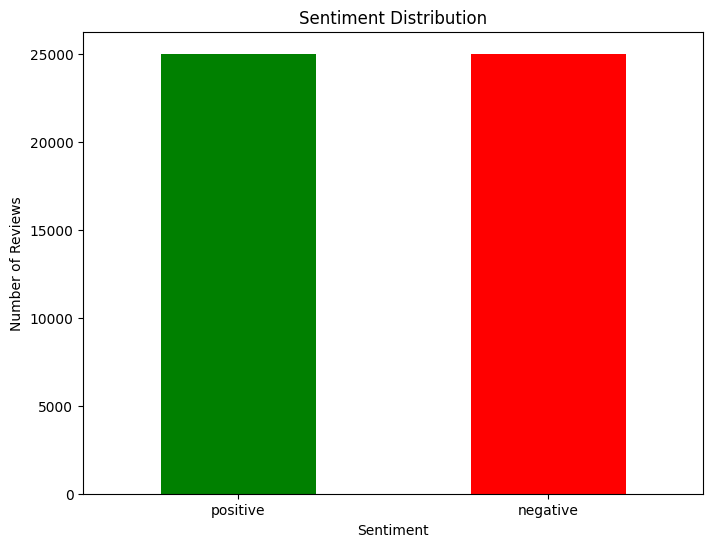

In [9]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])   # Generates a bar plot from above sentiment_counts
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [10]:
df['review_length'] = df['review'].apply(len)        # calculates lenght for each row
print(df['review_length'].mean())                    # stats of lenght
print(df['review_length'].median())
print(df['review_length'].mode())
print(df['review_length'].var())
print(df['review_length'].std())

1309.43102
970.0
0    658
Name: review_length, dtype: int64
979561.5425126099
989.7280144123484


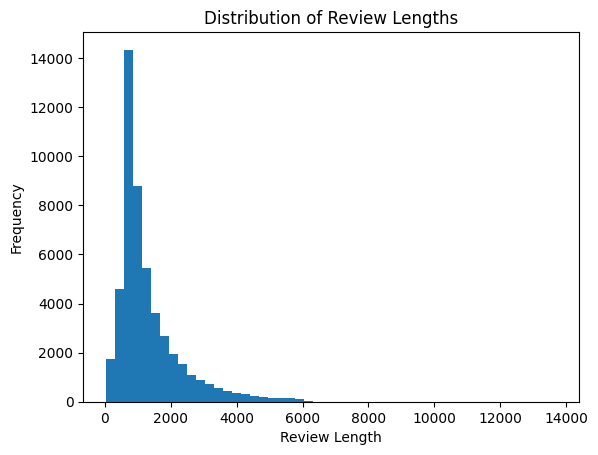

In [11]:
plt.hist(df['review_length'], bins=50)             # generates histogram of review_length
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

World Cloud of Dataset

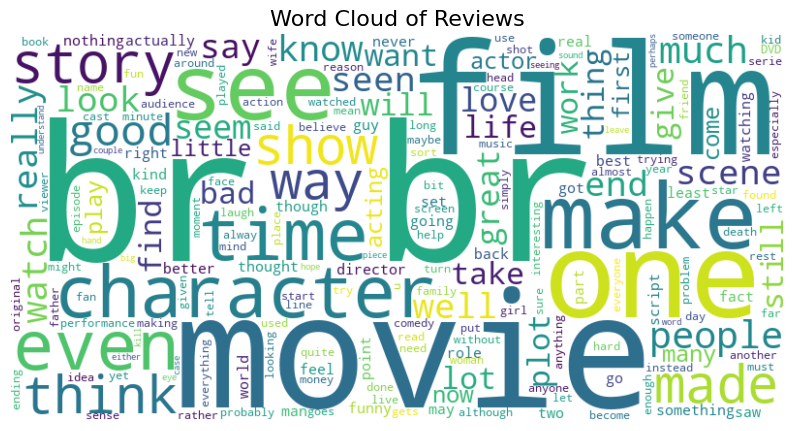

In [12]:
reviews = df['review'].astype(str).tolist()  # Converts text to string and list
all_reviews = ' '.join(reviews)              # joins all the strings in the list

wordcloud = WordCloud(                       # world cloud gets generated from the all_review
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # displaying of worldcloud
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=16)
plt.show()

# Text Preprocessing


Data Cleaning

In [13]:
stop_words = set(stopwords.words('english'))                   # importing stopwords
stop_words.discard('not')                                      # removing/discarding 'not' from the set of stopwords

def clean_text(text):
    text = re.sub('<.*?>', '', text)                           # removes HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)                      # removes punctuation
    text = text.lower()                                        # converts text to lower case

    words = text.split()                                       # splits the text into indivisual words
    words = [word for word in words if word not in stop_words] # new list with no stopwords
    text = ' '.join(words)                                     # joins them back
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

Tokenization

In [14]:
def tokenize_text(text):
    tokens = word_tokenize(text)                            # Tokenization of the processed text
    return tokens

df['tokenized_review'] = df['cleaned_review'].apply(tokenize_text)

Stemming and Lemmatization

In [15]:
stemmer = PorterStemmer()

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]                  # stemming of the Tokenized text
    return stemmed_tokens

df['stemmed_review'] = df['tokenized_review'].apply(stem_tokens)

In [16]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]       #Lemmatization of the Tokenized text
    return lemmatized_tokens

df['lemmatized_review'] = df['tokenized_review'].apply(lemmatize_tokens)

# Vectorization / Feature Extraction

TF-IDF

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)                # sets the max features to 5000

df['lemmatized_review_string'] = df['lemmatized_review'].apply(lambda x: ' '.join(x))      # joins backs the token

tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_review_string']).toarray()    #It converts processed text into a matrix using TF-IDF technique

In [18]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Bag of Words (BoW)

In [19]:
bow_vectorizer = CountVectorizer(max_features=5000)  # sets the max features to 5000
bow_matrix = bow_vectorizer.fit_transform(df['lemmatized_review_string']).toarray()
bow_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

N-grams

In [20]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(' '.join(words[i:i+n]))
    return ngrams

df['2grams'] = df['lemmatized_review_string'].apply(lambda x: generate_ngrams(x, 2))
df['3grams'] = df['lemmatized_review_string'].apply(lambda x: generate_ngrams(x, 3))

In [21]:
print(df[['lemmatized_review_string', '2grams', '3grams']].head())

                            lemmatized_review_string  \
0  one reviewer mentioned watching oz episode hoo...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically family little boy jake think zombie ...   
4  petter mattei love time money visually stunnin...   

                                              2grams  \
0  [one reviewer, reviewer mentioned, mentioned w...   
1  [wonderful little, little production, producti...   
2  [thought wonderful, wonderful way, way spend, ...   
3  [basically family, family little, little boy, ...   
4  [petter mattei, mattei love, love time, time m...   

                                              3grams  
0  [one reviewer mentioned, reviewer mentioned wa...  
1  [wonderful little production, little productio...  
2  [thought wonderful way, wonderful way spend, w...  
3  [basically family little, family little boy, l...  
4  [petter mattei love, mattei love time, love ti..

Word Hashing

In [22]:
hashing_vectorizer = HashingVectorizer(n_features=5000)

hashed_matrix = hashing_vectorizer.fit_transform(df['lemmatized_review_string'])

print(hashed_matrix.toarray())

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.08737041  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


# **Sprint - 2**

# Data splitting

In [23]:
#  tfidf_matrix as TF-IDF features and 'df['sentiment']' is target variable
X = tfidf_matrix
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building  

Trained Logistic Regression model with several other alternate models in the Pipeline for initial sentiment classification.

In [24]:
# Encode string labels to numeric
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Model Pipeline
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Training
    prediction = model.predict(X_test)  # Testing
    if name == "Logistic Regression":
        y_pred = prediction
    elif name == "Decision Tree":
        y_pred_tree = prediction
    elif name == "Random Forest":
        y_pred_rf = prediction
    elif name == "XGBoost":
        y_pred_xgb = prediction
    elif name == "AdaBoost":
        y_pred_ada = prediction

# Converting predictions back to original string labels for all models
y_pred_original = label_encoder.inverse_transform(y_pred)
y_pred_tree_original = label_encoder.inverse_transform(y_pred_tree)
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)
y_pred_ada_original = label_encoder.inverse_transform(y_pred_ada)

e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Model Evaluation

Comprehensive evaluation report with Classification report - accuracy, F1-score and confusion matrix and AUC & ROC curve.

Logistic Regression

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



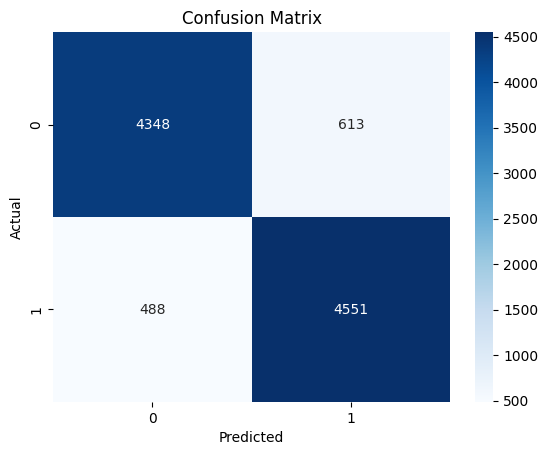

In [26]:
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

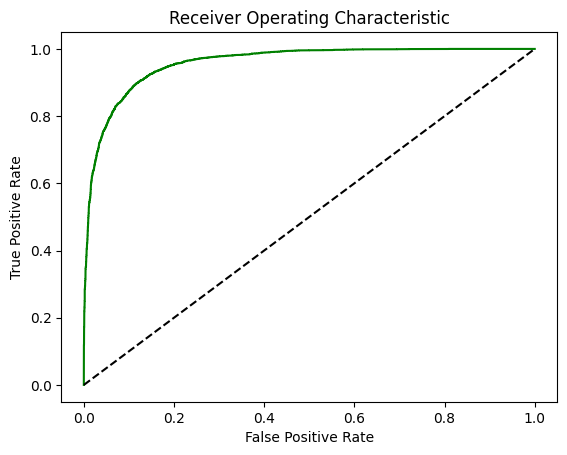

AUC: 0.9583113036597146


In [27]:
# Select the Logistic Regression model
logistic_model = models["Logistic Regression"]

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=label_encoder.transform(['positive'])[0])

# Calculate AUC
AUC = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


print("AUC:",AUC)

Decision Tree

In [28]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4961
           1       0.72      0.72      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



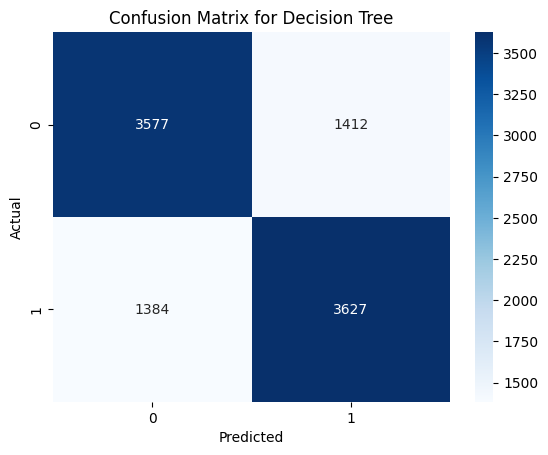

In [29]:
cm_tree = confusion_matrix(y_pred_tree, y_test)

# Plot the heatmap
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

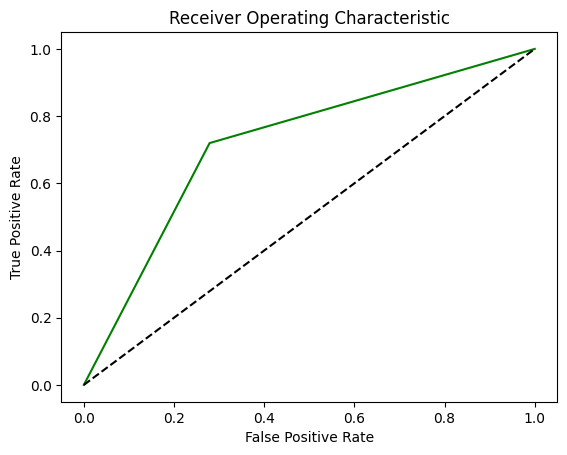

AUC: 0.7204048294298224


In [30]:
# Decision Tree
tree_model = models["Decision Tree"]
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=label_encoder.transform(['positive'])[0])

# Calculate AUC
AUC = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


print("AUC:",AUC)

Random forest

In [31]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



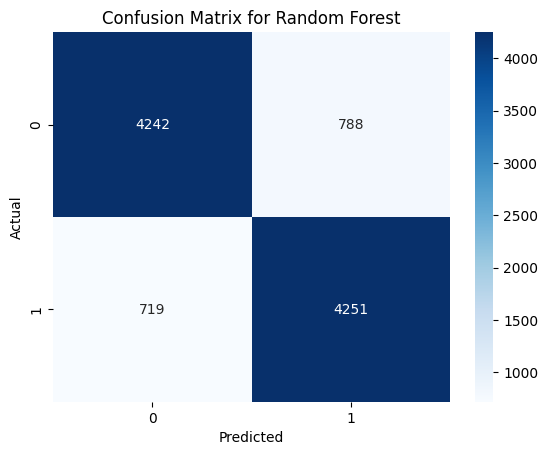

In [32]:
cm_rf = confusion_matrix(y_pred_rf, y_test)

# Plot the heatmap
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

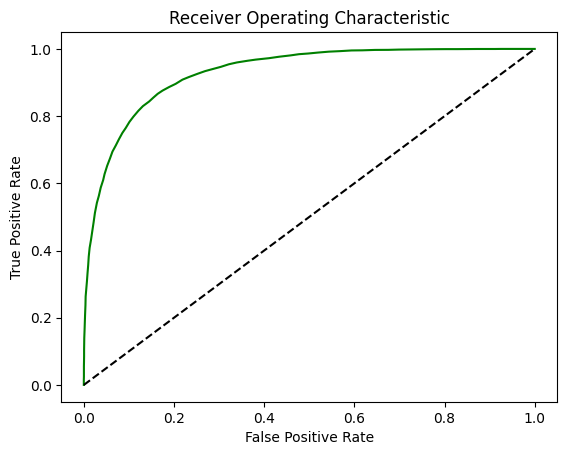

AUC: 0.9295639746722191


In [33]:
# Random Forest
rf_model = models["Random Forest"]
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=label_encoder.transform(['positive'])[0])

# Calculate AUC
AUC = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


print("AUC:",AUC)

XGBoost

In [34]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



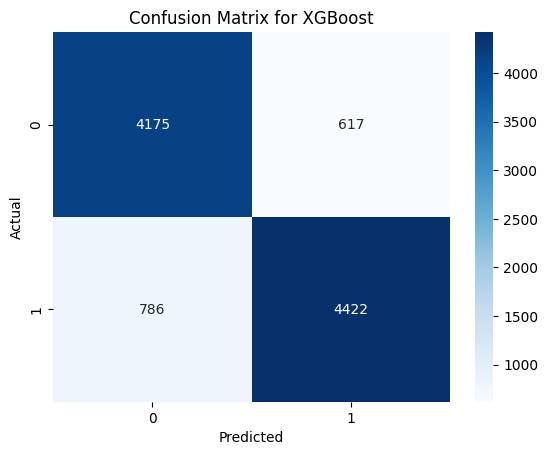

In [35]:
cm_xgb = confusion_matrix(y_pred_xgb, y_test)

# Plot the heatmap
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

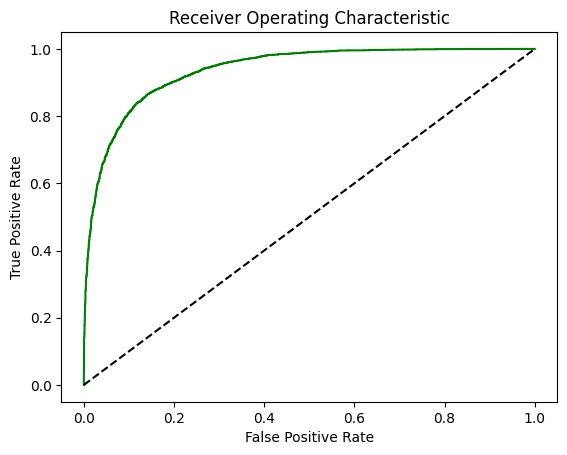

AUC: 0.9373187064701016


In [36]:
# XGBoost
xgb_model = models["XGBoost"]
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=label_encoder.transform(['positive'])[0])

# Calculate AUC
AUC = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


print("AUC:",AUC)

AdaBoost

In [37]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      4961
           1       0.78      0.84      0.81      5039

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



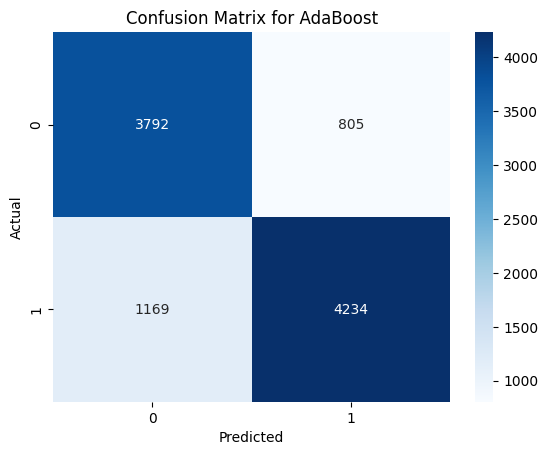

In [38]:
cm_ada = confusion_matrix(y_pred_ada, y_test)

# Plot the heatmap
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

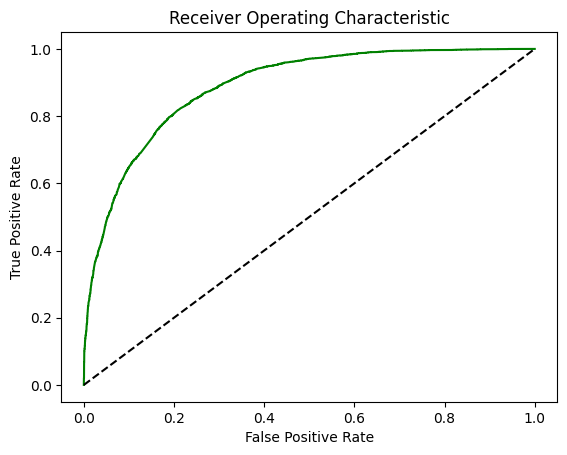

AUC: 0.8880536091815826


In [39]:
# AdaBoost
ada_model = models["AdaBoost"]
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=label_encoder.transform(['positive'])[0])

# Calculate AUC
AUC = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


print("AUC:",AUC)

# Model Test Cases


**Validate Model Training**

**Procedure** - Train the logistic regression model with sample data.

**Condition** - Model converges without errors.

**Expected** - Model coefficients are computed successfully.

In [40]:
print(models["Logistic Regression"].coef_)

[[ 0.50694316  0.27812316  0.60823245 ... -1.40537217 -1.31485592
  -0.20217966]]


**Validate Predictions**

**Procedure** - Use the trained Logistic regression model to
predict outputs for test data.

**Condition** - Predictions are in the range [0, 1].

**Expected** - All predicted probabilities fall within the valid range.

In [41]:
predictions = model.predict_proba(X_test)

# Check if all predictions are within the valid range [0, 1]
valid_predictions = np.all((predictions >= 0) & (predictions <= 1))

if valid_predictions:
  print("All predictions are within the valid range [0, 1]")
else:
  print("Some predictions are outside the valid range [0, 1]")

All predictions are within the valid range [0, 1]


**Validate Performance Metrics**

**Procedure** - Compute accuracy, precision, recall, F1- score.

**Condition** - Metrics align with expected values for sample data.

**Expected** - Metrics match manual calculations or baseline outputs.

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1) #Specify pos_label if needed
recall = recall_score(y_test, y_pred, pos_label=1) #Specify pos_label if needed
f1 = f1_score(y_test, y_pred, pos_label=1) #Specify pos_label if needed


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8899
Precision: 0.8812935708752905
Recall: 0.9031553879738043
F1-score: 0.8920905615995296


# Conclusion

Logistic Regression is the best-performing model with the highest accuracy (0.89), precision (0.88), and AUC (0.95), offering reliable and interpretable predictions. Random Forest and XGBoost are strong alternatives but less interpretable, while AdaBoost and Decision Tree underperform. Logistic Regression’s balanced performance makes it the ideal choice.


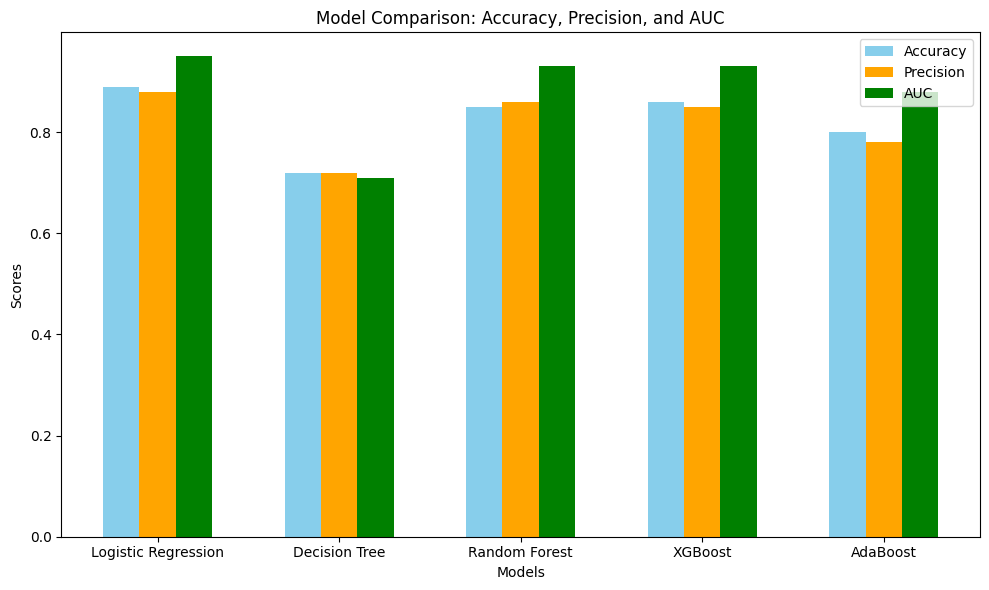

In [43]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']
accuracy = [0.89, 0.72, 0.85, 0.86, 0.80]
precision = [0.88, 0.72, 0.86, 0.85, 0.78]
auc_scores = [0.95, 0.71, 0.93, 0.93, 0.88]

x = range(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2

ax.bar([i - width for i in x], accuracy, width, label='Accuracy', color='skyblue')
ax.bar(x, precision, width, label='Precision', color='orange')
ax.bar([i + width for i in x], auc_scores, width, label='AUC', color='green')

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Comparison: Accuracy, Precision, and AUC")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center')
ax.legend()

plt.tight_layout()
plt.show()

# **Sprint - 3**

# Hyper-parameter Tuning

Hyperparameter Tuning for Logistic Regression

In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
from sklearn.metrics import classification_report, accuracy_score

y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))

e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8895


Hyperparameter Tuning for Decision Tree

In [45]:
# Define the parameter grid for hyperparameter tuning
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')

# Use 10% of the data for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Fit the GridSearchCV object to the smaller training dataset
grid_search_tree.fit(X_train_small, y_train_small)

# Get the best hyperparameters for Decision Tree
best_params_tree = grid_search_tree.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_tree)

# Train a new Decision Tree model with the best hyperparameters
best_tree_model = DecisionTreeClassifier(**best_params_tree)
best_tree_model.fit(X_train, y_train)  # Train on the full training data

# Evaluate the best Decision Tree model on the test data
y_pred_best_tree = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred_best_tree))

Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      4961
           1       0.69      0.85      0.76      5039

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



Hyperparameter Tuning for Random Forest

In [46]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Use 10% of the data for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Fit the GridSearchCV object to the smaller training dataset
grid_search_rf.fit(X_train_small, y_train_small)

# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)  # Train on the full training data

# Evaluate the best Random Forest model on the test data
y_pred_best_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Hyperparameter Tuning for XGBoost

In [47]:
import importlib


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Split the data for hyperparameter tuning (use a small subset of the data)
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Create a GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV object to the smaller training dataset
grid_search_xgb.fit(X_train_small, y_train_small)

# Get the best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Train a new XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(
    **best_params_xgb, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)
best_xgb_model.fit(X_train, y_train)  # Train on the full training data

# Evaluate the best XGBoost model on the test data
y_pred_best_xgb = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_best_xgb))


e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:45:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Hyperparameter Tuning for AdaBoost

In [49]:
# Hyperparameter Tuning for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create a GridSearchCV object for AdaBoost
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='accuracy')

# Use 10% of the data for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Fit the GridSearchCV object to the smaller training dataset
grid_search_ada.fit(X_train_small, y_train_small)

# Get the best hyperparameters for AdaBoost
best_params_ada = grid_search_ada.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_ada)

# Train a new AdaBoost model with the best hyperparameters
best_ada_model = AdaBoostClassifier(**best_params_ada, random_state=42)
best_ada_model.fit(X_train, y_train)  # Train on the full training data

# Evaluate the best AdaBoost model on the test data
y_pred_best_ada = best_ada_model.predict(X_test)
print(classification_report(y_test, y_pred_best_ada))

e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Best Hyperparameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}


e:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4961
           1       0.84      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Conclusion of Hyperparameter Tuning

Comparison for all Untuned and Tuned models

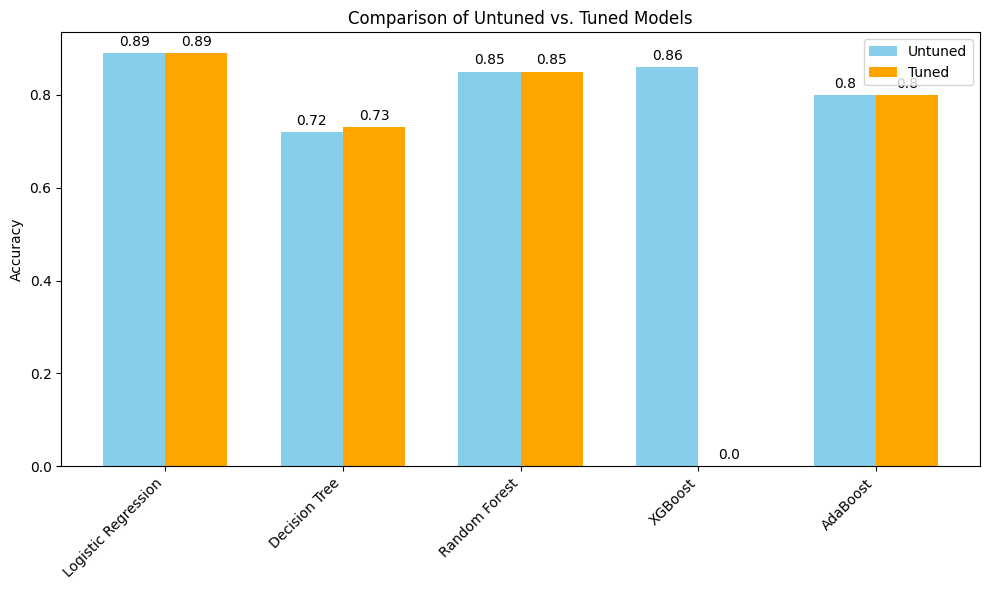

In [50]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']
untuned_accuracy = [0.89, 0.72, 0.85, 0.86, 0.80]
tuned_accuracy = [0.89, 0.73, 0.85, 0, 0.80]

x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, untuned_accuracy, width, label='Untuned', color='skyblue')
rects2 = ax.bar([i + width for i in x], tuned_accuracy, width, label='Tuned', color='orange')


ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Untuned vs. Tuned Models')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models, rotation=45, ha='right') 
ax.legend()

# Add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [52]:
import pickle
import os
from sklearn.linear_model import LogisticRegression  

# Replace 'trained_model' with your trained Logistic Regression model
trained_model = logistic_model   # Example only; replace with your actual trained model

# Define the directory and file path
directory = "Downloads"
file_name = "best_model.pkl"
vect_file = "vectorizer.pkl"
pickle_file_path = os.path.join(directory, file_name)
vect_file_path = os.path.join(directory, vect_file)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the trained model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(trained_model, file)

vectorizer = tfidf_vectorizer

# Assume 'vectorizer' is your trained vectorizer
with open(vect_file_path, 'wb') as file:
    pickle.dump(vectorizer, file)


print(f"Model saved as {pickle_file_path}")
print(f"Vector file saved as {vect_file_path}")


Model saved as Downloads\best_model.pkl
Vector file saved as Downloads\lemm.pkl
